In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [71]:
df = pd.read_csv('./survey lung cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [72]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [73]:
## заменим 2(YES) на 1 и 1(NO) на 0
df.iloc[:, 2:-1] = df.iloc[:, 2:-1].replace({2: 1, 1: 0})

In [74]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [75]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [76]:
df['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [77]:
## заменим YES = 1, NO = 0, M = 0, F = 1 в полях целевой переменной и GENDER
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}).astype('int8')
df['GENDER'] = df['GENDER'].replace({'F': 1, 'M': 0}).astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int8 
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [78]:
# уберем пробелы из названий колонок
df.rename(columns={"CHRONIC DISEASE": "CHRONIC_DISEASE",
                  "ALCOHOL CONSUMING": "ALCOHOL_CONSUMING",
                  "SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH",
                  "SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY",
                  "ALLERGY ": "ALLEGRY"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int8 
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC_DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLEGRY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL_CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS_OF_BREATH    309 non-null    int64
 13  SWALLOWING_DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [79]:
df.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLEGRY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST PAIN,LUNG_CANCER
187,0,55,1,0,0,0,0,1,0,0,0,0,0,0,0,1
67,0,66,1,0,0,0,0,1,0,1,1,1,1,0,0,1
197,0,59,0,1,1,0,0,1,0,1,0,0,0,1,1,1
84,0,56,0,0,0,0,1,1,1,0,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
289,1,61,1,0,0,0,1,1,1,0,0,0,1,0,0,1
228,1,56,0,1,0,1,0,1,0,0,0,1,1,0,1,1
275,0,64,1,1,1,1,1,0,0,0,1,0,0,1,1,1
222,1,77,0,0,0,1,1,1,1,1,1,0,0,0,1,1
220,1,57,0,0,1,1,1,1,1,1,1,0,1,1,1,1


<AxesSubplot:>

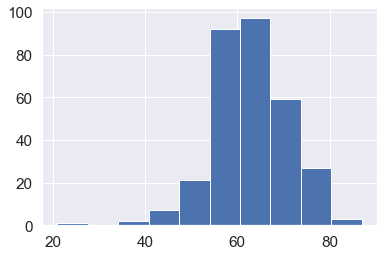

In [80]:
# посмотрим на распределение возрастов, нет ли нереальных значений
df['AGE'].hist()

<AxesSubplot:>

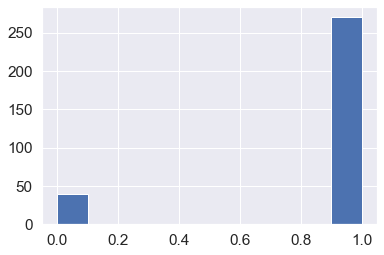

In [81]:
#распределение целеавой переменной, сбалансирован ли датасет
df['LUNG_CANCER'].hist()
# не очень сбалансирован, здоровых в разы меньше, метрику придется брать не точность, а f1 или лучше roc_auc

In [82]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLEGRY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Cancer:
Smokers: 155
Non-smokers: 115


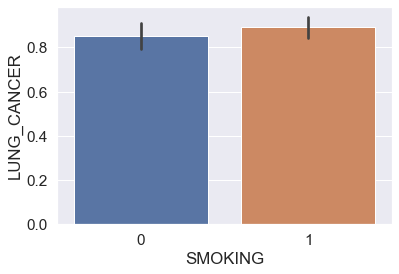

In [83]:
sns.barplot(x = 'SMOKING', y='LUNG_CANCER', data=df)
print(f'Cancer:\nSmokers: {df["LUNG_CANCER"][df["SMOKING"] == 1].value_counts()[1]}\nNon-smokers: {df["LUNG_CANCER"][df["SMOKING"] == 0].value_counts()[1]}')


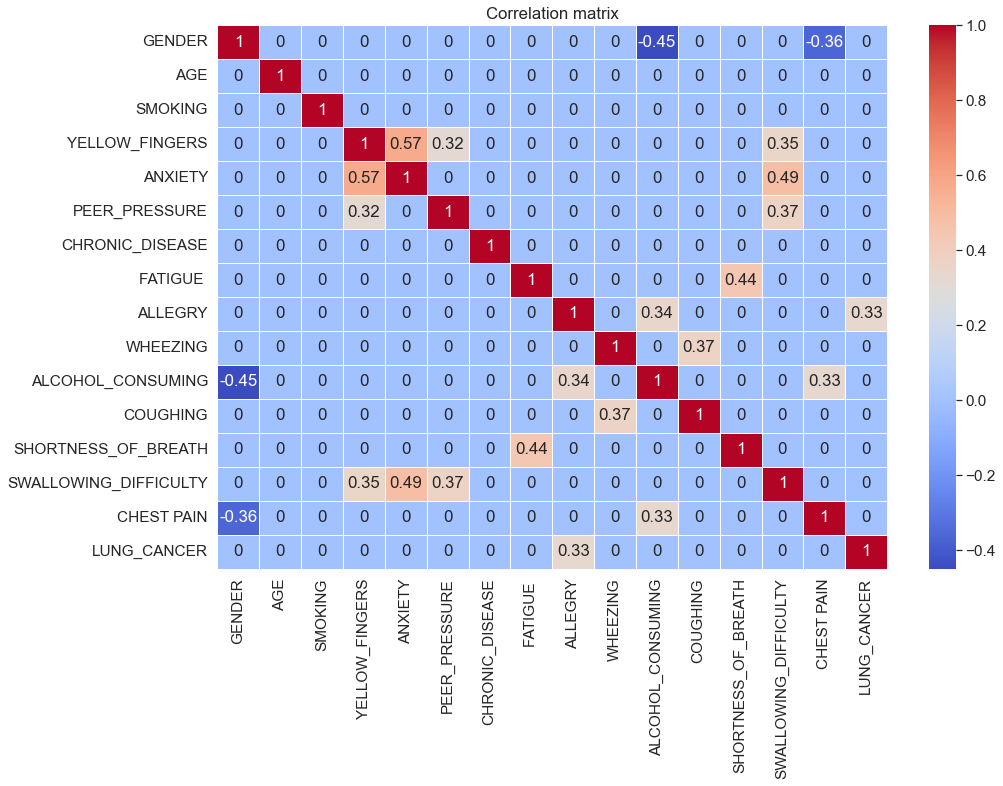

In [84]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

x = df.drop(columns="LUNG_CANCER")
y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((231, 15), (78, 15), (231,), (78,))

In [101]:
# для обучения возьмем модель решающего дерева и в цикле будем перебирать параметры глубины, и запоминать метрики
def train_visualize(X_train, Y_train, X_test, Y_test, depths):
    roc_auc_train = []
    roc_auc_test = []
    
    for depth in depths:
        
        model = DecisionTreeClassifier(criterion='entropy',
                                  min_samples_leaf=2,
                                  max_depth=depth, random_state=100)
        model.fit(X_train, Y_train)
        y_train_pred = model.predict(X_train)
        roc_auc_train.append(roc_auc_score(Y_train, y_train_pred))
        y_test_pred = model.predict(X_test)
        roc_auc_test.append(roc_auc_score(Y_test, y_test_pred))
    
    plt.plot(depths, roc_auc_train, c='blue', label='train')
    plt.plot(depths, roc_auc_test, c='red', label='test')
    plt.legend()
    plt.xlabel('depth')
    plt.ylabel('roc_auc_score')
    plt.show()
    index = roc_auc_test.index(max(roc_auc_test))
    best_depth = depths[index]
    print(roc_auc_test.index(max(roc_auc_test)), roc_auc_test, best_depth)
    return max(roc_auc_train), max(roc_auc_test), best_depth

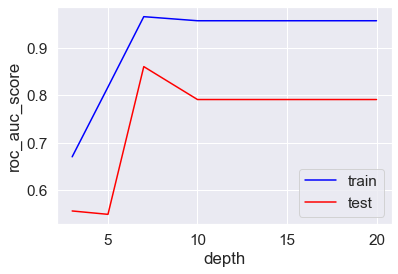

2 [0.5553571428571429, 0.5482142857142858, 0.8607142857142858, 0.7910714285714286, 0.7910714285714286] 7


In [102]:
max_train, max_test, best_max_depth = train_visualize(x_train, y_train, x_test, y_test, [3, 5, 7, 10, 20])

In [103]:
print(f'Лучший скор на тренировочном: {max_train}\nНа тестовом: {max_test}\nМаксимальная глубина при лучшем скоре на тесте: {best_max_depth}')

Лучший скор на тренировочном: 0.9663709677419354
На тестовом: 0.8607142857142858
Максимальная глубина при лучшем скоре на тесте: 7
